# Physics 5300 Final Problem Set - Triple Pendulum

Created 4-24-19 by Lucas Nestor  
Revised 4-24-19 by Lucas Nestor

In this notebook we will extend our simulation of a double pendulum to a triple pendulum. To derive the Lagrangian, we will work in Cartesian coordinates. The coordinates of each mass are given below.

$\quad x_1 = L_1 \sin(\theta_1)$  
$\quad y_1 = -L_1 \cos(\theta_1)$

$\quad x_2 = L_1 \sin(\theta_1) + L_2 \sin(\theta_2)$  
$\quad y_2 = -L_1 \cos(\theta_1) - L_2 \cos(\theta_2)$

$\quad x_3 = L_1 \sin(\theta_1) + L_2 \sin(\theta_2) + L_3 \sin(\theta_3)$  
$\quad y_3 = -L_1 \cos(\theta_1) - L_2 \cos(\theta_2) - L_3 \cos(\theta_3)$

Now we define the energies. Note that y is defined to be negative above.

$\quad T = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2 (\dot x_2^2 + \dot y_2^2) + \frac{1}{2} m_3 (\dot x_3^2 + \dot y_3^2)$  
$\quad U = m_1 g y_1 + m_2 g y_2 + m_3 g y_3$

Mathematica can solve these equations of motion, and I'll just put them into the code instead of also typing them here. My pinky hurts too much from doing so many underscores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [19]:
class TriplePendulum():
    def __init__(self, m1=1., m2=1., m3=1., L1=1., L2=1., L3=1., g=1.):
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.g = g
        
    def theta_1_double_dot(self, y):
        theta_1, theta_2, theta_3, theta_1_dot, theta_2_dot, theta_3_dot = y
        
        first_term = self.m2 * (self.m2 + self.m3) \
            + self.m1 * (2 * self.m2 + self.m3) \
            - self.m1 * self.m3 * np.cos(2 * (theta_2 - theta_3))
        second_term = self.g * self.m2 * (self.m2 + self.m3) * np.sin(theta_1 - 2 * theta_2)
        third_term = (self.m2 + self.m3) * (self.L1 * np.cos(theta_1 - theta_2) * theta_1_dot**2 \
            + self.L2 * theta_2_dot**2)
        fourth_term = self.L3 * self.m3 * np.cos(theta_2 - theta_3) * theta_3_dot**2
        numerator = self.g * first_term * np.sin(theta_1) + second_term \
            + 2 * self.m2 * np.sin(theta_1 - theta_2) * (third_term + fourth_term)
        
        denominator = self.L1 * (self.m2 * (2 * self.m2 + self.m2) \
            + (self.m1 + self.m2) * self.m3 \
            - self.m2 * (self.m2 + self.m3) * np.cos(2 * (theta_1 - theta_2)) \
            - self.m1 * self.m3 * np.cos(2 * (theta_2 - theta_3)))
        
        return -numerator / denominator
    
    def theta_2_double_dot(self, y):
        theta_1, theta_2, theta_3, theta_1_dot, theta_2_dot, theta_3_dot = y
        
        first_term = (2 * self.m2 * (self.m1 + self.m2) \
            + (self.m1 + 2 * (self.m2)) * self.m3) * np.sin(theta_1 - theta_2) \
            - self.m1 * self.m3 * np.sin(theta_1 + theta_2 - 2 * theta_3)
        second_term = (2 * self.m2 * (self.m1 + self.m2) \
            + (self.m1 + 2 * self.m2) * self.m3) * np.sin(theta_1 - theta_2) \
            - self.m1 * self.m3 * np.sin(theta_1 + theta_2 - 2 * theta_3)
        third_term = self.m2 * (self.m2 + self.m3) * np.sin(2 * (theta_1 - theta_2)) \
            - self.m1 * self.m3 * np.sin(2 * (theta_2 - theta_3))  
        fourth_term = self.m2 * np.cos(theta_1 - theta_3) * np.sin(theta_1 - theta_2) \
            - self.m1 * np.sin(theta_2 - theta_3)
        numerator = self.g * np.cos(theta_1) * first_term \
            + self.L1 * second_term * theta_1_dot**2 \
            + self.L2 * third_term * theta_2_dot**2 \
            + 2 * self.L3 * self.m3 * fourth_term * theta_3_dot**2
        
        denominator = self.L2 * (self.m2 * (2 * (self.m1 + self.m2) \
            + (self.m1 + self.m2) * self.m3 - self.m2 * (self.m2 + self.m3) * np.cos(2 * (theta_1 - theta_2))\
            - self.m1 * self.m3 * np.cos(2 * (theta_2 - theta_3))))
        
        return numerator / denominator
    
    def theta_3_double_dot(self, y):
        theta_1, theta_2, theta_3, theta_1_dot, theta_2_dot, theta_3_dot = y
        
        first_term = np.cos(theta_1 - theta_2) * (self.g * np.cos(theta_1) + self.L1 * theta_1_dot**2) \
            + self.L2 * theta_2_dot**2
        second_term = self.L3 * self.m3 * np.cos(theta_2 - theta_3) * theta_3_dot**2
        numerator = 2 * self.m2 * np.sin(theta_2 - theta_3) * ((self.m2 + self.m3) * first_term + second_term)
        
        denominator = self.L3 * (self.m2 * (2 * self.m1 + self.m2) \
            + (self.m1 + self.m2) * self.m3 \
            - self.m2 * (self.m2 + self.m3) * np.cos(2 * (theta_1 - theta_2))
            - self.m1 * self.m3 * np.cos(2 * (theta_2 - theta_3)))
        
        return numerator / denominator
    
    def dy_dt(self, t, y):
        dy_dt_vec = np.zeros(6)
        dy_dt_vec[0:3] = y[3:6]
        dy_dt_vec[3] = self.theta_1_double_dot(y)
        dy_dt_vec[4] = self.theta_2_double_dot(y)
        dy_dt_vec[5] = self.theta_3_double_dot(y)
        
        return dy_dt_vec
        
    def solve_ode(self, t_pts, initial_conditions, abserr=1.0e-10, relerr=1.0e-10):
        """
        Solves the motion for a given set of initial conditions.
        
        Parameters
        ==========
        t_pts : float
                time
        initial_conditions : float
                             array in the form of [theta1, theta2, theta_3, theta1_dot, theta2_dot, theta3_dot]
        abserr : float
                 absolute error threshold
        relerr : float
                relative error threshold
        """
        return solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), initial_conditions, 
                         t_eval=t_pts, rtol=relerr, atol=abserr).y
        

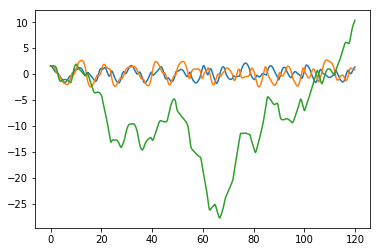

In [24]:
t_pts = np.arange(0., 120.0, 0.1)

theta_1_0 = theta_2_0 = theta_3_0 = np.pi / 2
theta_1_dot_0 = theta_2_dot_0 = theta_3_dot_0 = 0
initial_conditions = [theta_1_0, theta_2_0, theta_3_0, theta_1_dot_0, theta_2_dot_0, theta_3_dot_0]

pend = TriplePendulum()
y = pend.solve_ode(t_pts, initial_conditions)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(t_pts, y[0])
ax.plot(t_pts, y[1])
ax.plot(t_pts, y[2])